In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from math import radians, sin, cos, sqrt, atan2

%matplotlib inline

In [20]:
gps_data = pd.read_csv('../data/gps.csv')
gps_data.head()

,Id,Longitude,Latitude,Accuracy,TimeStamp,Date,DateTime,IsGPSOn,BatLevel,Provider,Bearing,DeviceTime,RepId
0,883873960,80.55590,7.16898,2.3,1695694012000,26/09/2023 12:00:00 AM,26/09/2023 2:06:52 AM,True,0,gps,124.15,26/09/2023 7:36:54 AM,395
1,883873961,80.55589,7.16899,2.1,1695694025000,26/09/2023 12:00:00 AM,26/09/2023 2:07:05 AM,True,0,gps,152.95,26/09/2023 7:37:05 AM,395
2,883874460,80.55589,7.16899,3.6,1695694027676,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.10,26/09/2023 7:37:08 AM,395
3,883874461,80.55589,7.16899,3.5,1695694028176,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.39,26/09/2023 7:37:08 AM,395
4,883874462,80.55586,7.16899,3.1,1695694029000,26/09/2023 12:00:00 AM,26/09/2023 2:07:09 AM,True,0,gps,187.51,26/09/2023 7:37:09 AM,395


In [21]:
gps_data.shape

(166593, 13)

In [22]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166593 entries, 0 to 166592
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          166593 non-null  int64  
 1   Longitude   166593 non-null  float64
 2   Latitude    166593 non-null  float64
 3   Accuracy    166593 non-null  float64
 4   TimeStamp   166593 non-null  int64  
 5   Date        166593 non-null  object 
 6   DateTime    166593 non-null  object 
 7   IsGPSOn     166593 non-null  bool   
 8   BatLevel    166593 non-null  int64  
 9   Provider    166593 non-null  object 
 10  Bearing     166593 non-null  float64
 11  DeviceTime  166593 non-null  object 
 12  RepId       166593 non-null  int64  
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 15.4+ MB


In [23]:
gps_data.isnull().sum()

Id            0
Longitude     0
Latitude      0
Accuracy      0
TimeStamp     0
Date          0
DateTime      0
IsGPSOn       0
BatLevel      0
Provider      0
Bearing       0
DeviceTime    0
RepId         0
dtype: int64

In [24]:
gps_data['Longitude'].value_counts()

Longitude
80.59282    2314
80.59281    1890
80.59284    1799
80.55588    1723
80.55592    1703
            ... 
80.57054       1
80.55631       1
80.58905       1
80.55635       1
80.59440       1
Name: count, Length: 3328, dtype: int64

In [25]:
gps_data['Date'].value_counts()

Date
26/09/2023 12:00:00 AM    166593
Name: count, dtype: int64

In [26]:
gps_data.columns

Index(['Id', 'Longitude', 'Latitude', 'Accuracy', 'TimeStamp', 'Date',
       'DateTime', 'IsGPSOn', 'BatLevel', 'Provider', 'Bearing', 'DeviceTime',
       'RepId'],
      dtype='object')

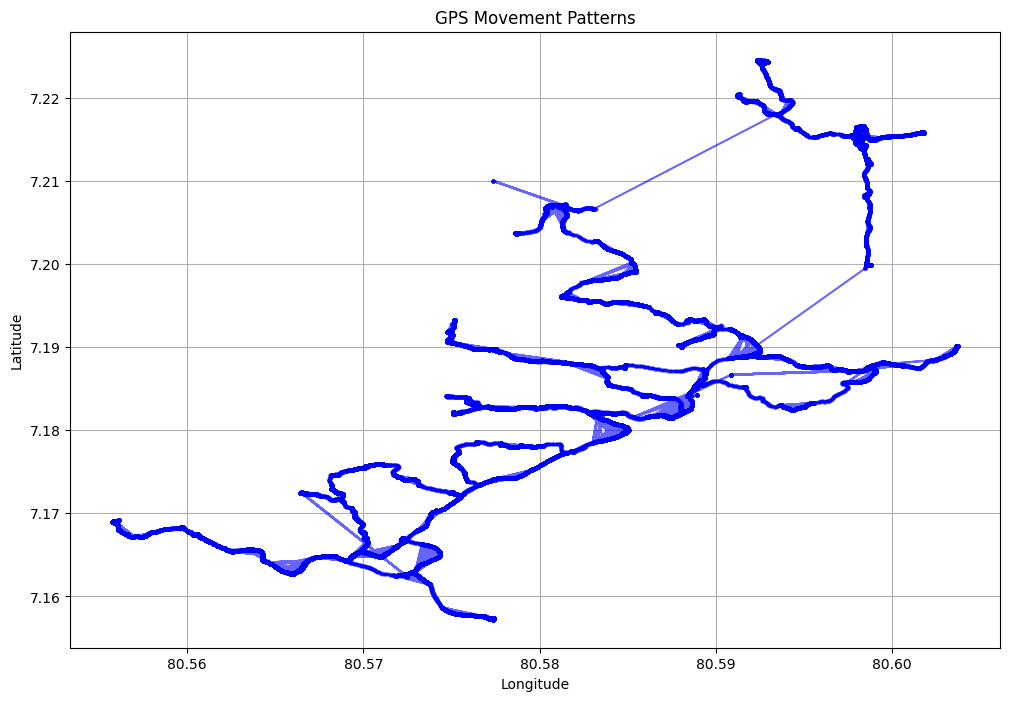

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Movement Patterns')
plt.grid(True)
plt.show()

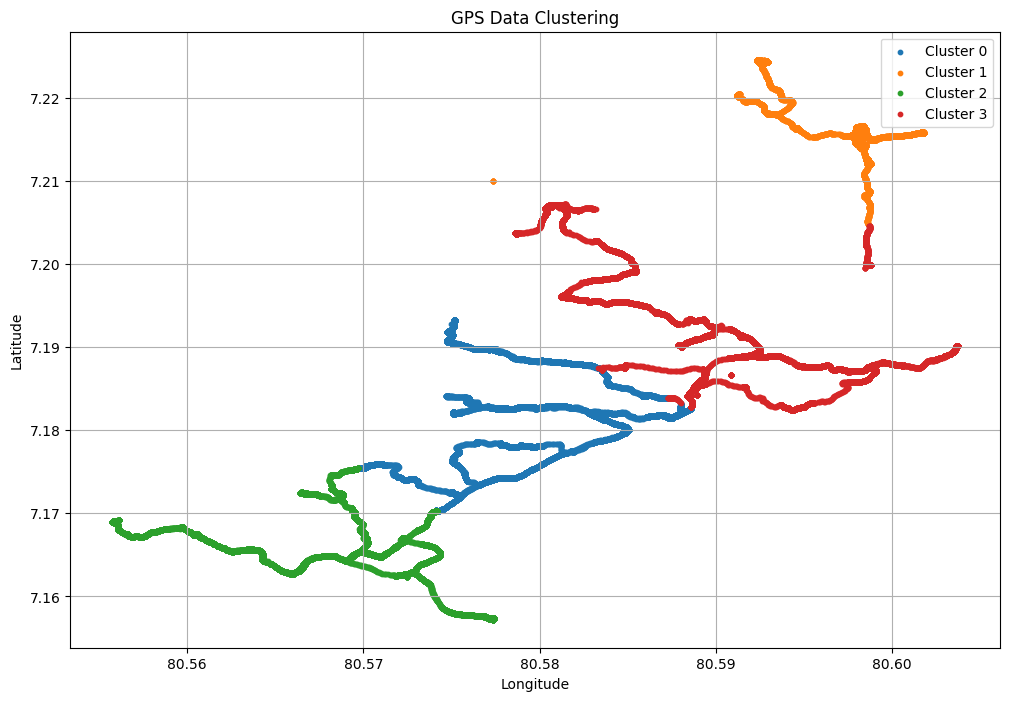

In [28]:
features = gps_data[['Longitude', 'Latitude']]
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gps_data['Cluster'] = kmeans.fit_predict(features)

# Plot the clustered data
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    clustered_data = gps_data[gps_data['Cluster'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Data Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Ensure the 'TimeStamp' column is in datetime format
gps_data['DateTime'] = pd.to_datetime(gps_data['TimeStamp'], unit='ms')

# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

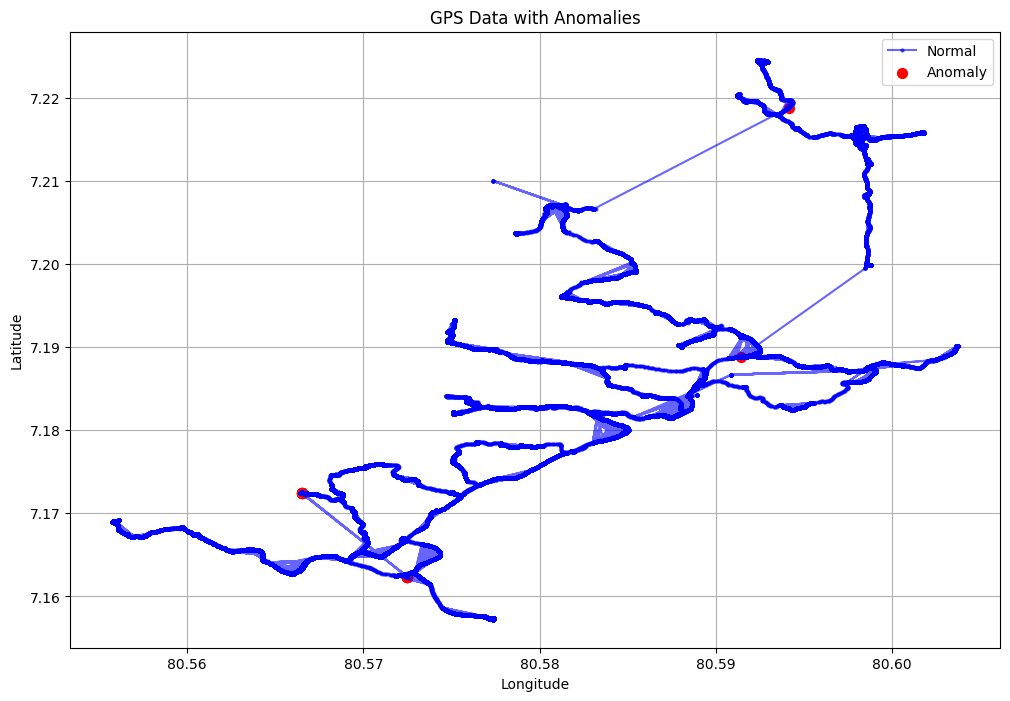

              Id  Longitude  Latitude  Accuracy      TimeStamp  \
34846  884227459   80.56649   7.17251     1.900  1695700026000   
34847  884227460   80.57249   7.16236  1399.999  1695700026637   
35045  884227658   80.56649   7.17251     1.900  1695700023000   
35046  884227659   80.57249   7.16236  1399.999  1695700026637   
35056  884227669   80.56649   7.17251     2.000  1695700024000   

                         Date                DateTime  IsGPSOn  BatLevel  \
34846  26/09/2023 12:00:00 AM 2023-09-26 03:47:06.000     True        92   
34847  26/09/2023 12:00:00 AM 2023-09-26 03:47:06.637     True        92   
35045  26/09/2023 12:00:00 AM 2023-09-26 03:47:03.000     True        92   
35046  26/09/2023 12:00:00 AM 2023-09-26 03:47:06.637     True        92   
35056  26/09/2023 12:00:00 AM 2023-09-26 03:47:04.000     True        92   

      Provider  Bearing             DeviceTime  RepId  Cluster  \
34846      gps   293.96  26/09/2023 9:17:06 AM    395        2   
34847  network

In [31]:
# Calculate distances between consecutive points
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Identify anomalies (e.g., distance > 1 km in a short time interval)
distance_threshold = 1.0  # 1 km
gps_data['Anomaly'] = gps_data['Distance_km'] > distance_threshold

# Plot the anomalies
plt.figure(figsize=(12, 8))
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6, label='Normal')
plt.scatter(gps_data[gps_data['Anomaly']]['Longitude'], gps_data[gps_data['Anomaly']]['Latitude'], color='r', s=50, label='Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Data with Anomalies')
plt.legend()
plt.grid(True)
plt.show()

# Display the anomalies in a table
anomalies = gps_data[gps_data['Anomaly']]
print(anomalies.head())

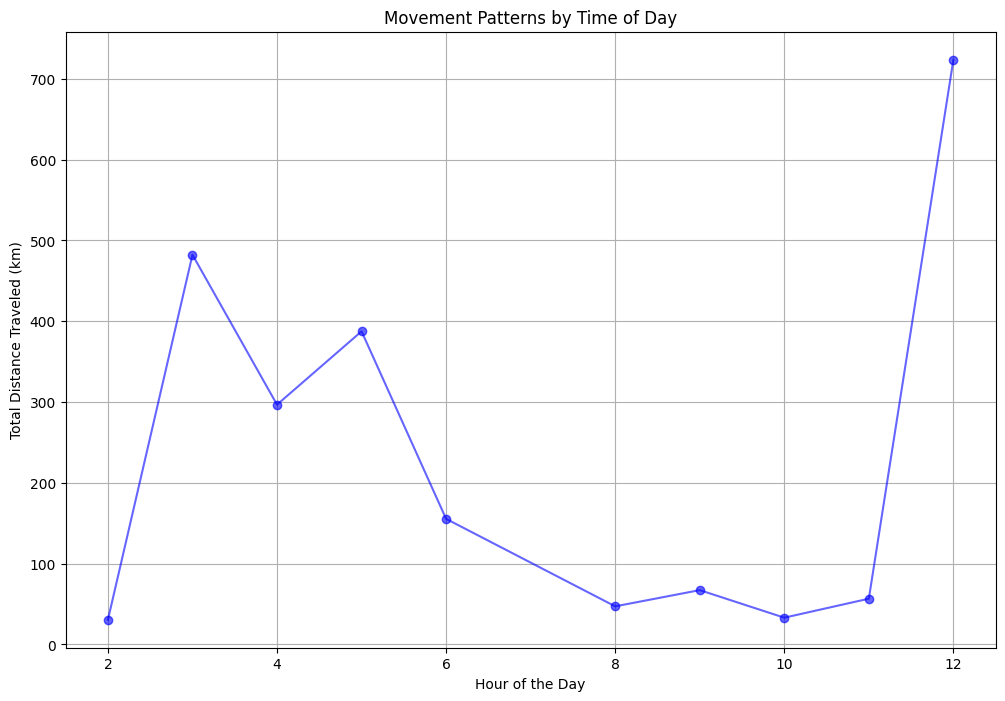

In [54]:
# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Movement Patterns by Time of Day')
plt.grid(True)
plt.show()

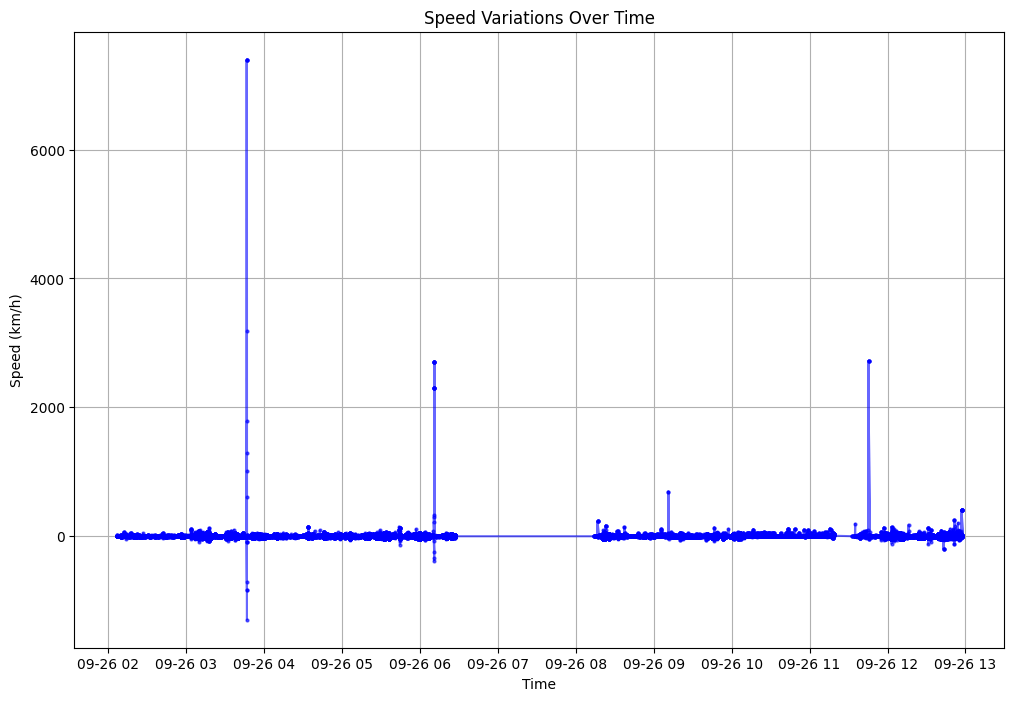

In [57]:
# Calculate distances and time differences
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)
gps_data['Time_Diff'] = (gps_data['DateTime'].shift(-1) - gps_data['DateTime']).dt.total_seconds()

# Calculate speed in km/h
gps_data['Speed_kmh'] = gps_data['Distance_km'] / (gps_data['Time_Diff'] / 3600)

# Drop rows with NaN values
gps_data.dropna(subset=['Speed_kmh'], inplace=True)

# Plot speed variations over time
plt.figure(figsize=(12, 8))
plt.plot(gps_data['DateTime'], gps_data['Speed_kmh'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.title('Speed Variations Over Time')
plt.grid(True)
plt.show()

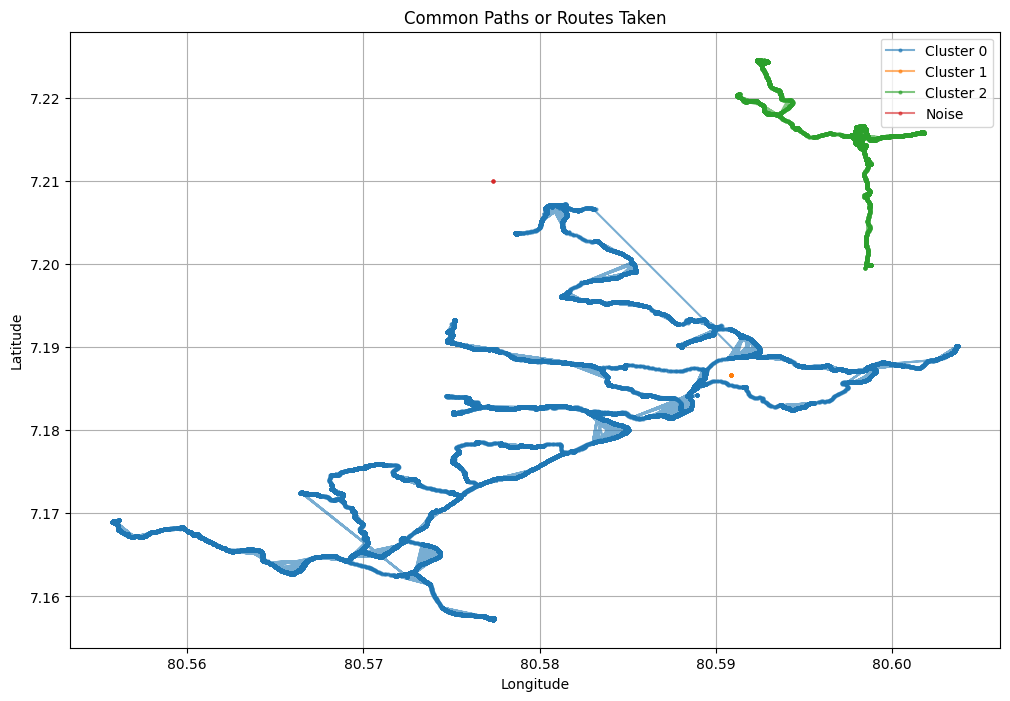

In [58]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Extract relevant features for clustering
features = gps_data[['Longitude', 'Latitude']]

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.0005, min_samples=10)
gps_data['DBSCAN_Cluster'] = dbscan.fit_predict(features)


plt.figure(figsize=(12, 8))
unique_clusters = gps_data['DBSCAN_Cluster'].unique()
for cluster in unique_clusters:
    if cluster == -1:  # Noise
        color = 'k'
        label = 'Noise'
    else:
        color = None
        label = f'Cluster {cluster}'
    clustered_data = gps_data[gps_data['DBSCAN_Cluster'] == cluster]
    plt.plot(clustered_data['Longitude'], clustered_data['Latitude'], marker='o', markersize=2, linestyle='-', label=label, alpha=0.6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Common Paths or Routes Taken')
plt.legend()
plt.grid(True)
plt.show()


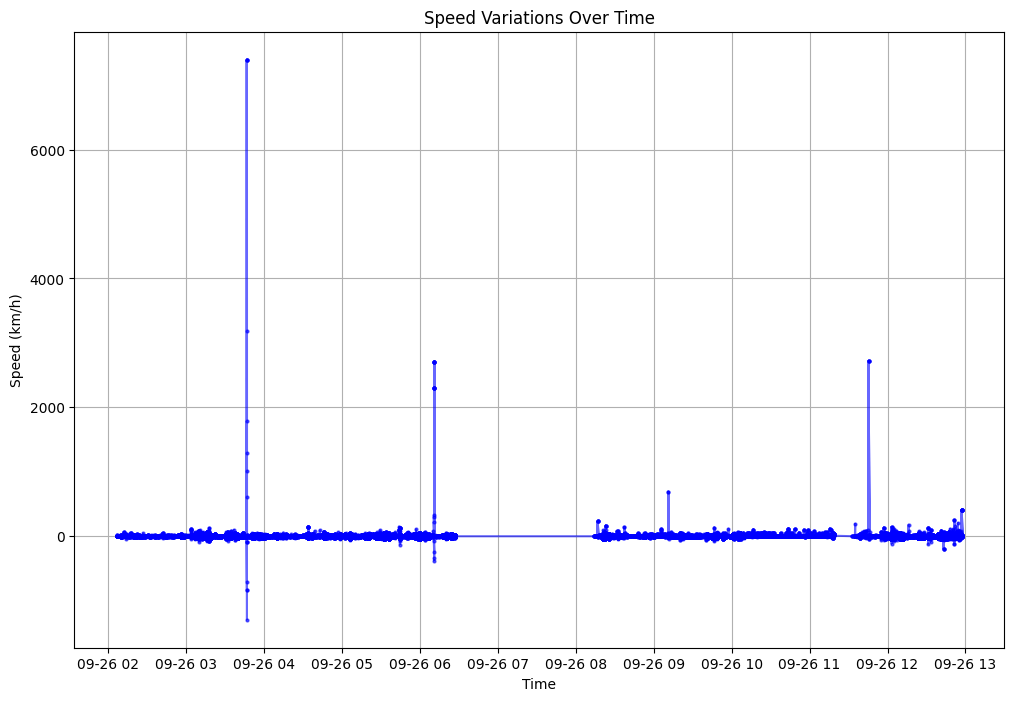

In [59]:
# Ensure the 'TimeStamp' column is in datetime format
gps_data['DateTime'] = pd.to_datetime(gps_data['TimeStamp'], unit='ms')

# Calculate time difference in seconds
gps_data['Next_DateTime'] = gps_data['DateTime'].shift(-1)
gps_data['Time_Diff'] = (gps_data['Next_DateTime'] - gps_data['DateTime']).dt.total_seconds()

# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Calculate speed in km/h
gps_data['Speed_kmh'] = (gps_data['Distance_km'] / gps_data['Time_Diff']) * 3600

# Remove infinite values and NaNs that might result from division by zero or missing data
gps_data.replace([np.inf, -np.inf], np.nan, inplace=True)
gps_data.dropna(subset=['Speed_kmh'], inplace=True)

# Plot the speed variations
plt.figure(figsize=(12, 8))
plt.plot(gps_data['DateTime'], gps_data['Speed_kmh'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.title('Speed Variations Over Time')
plt.grid(True)
plt.show()


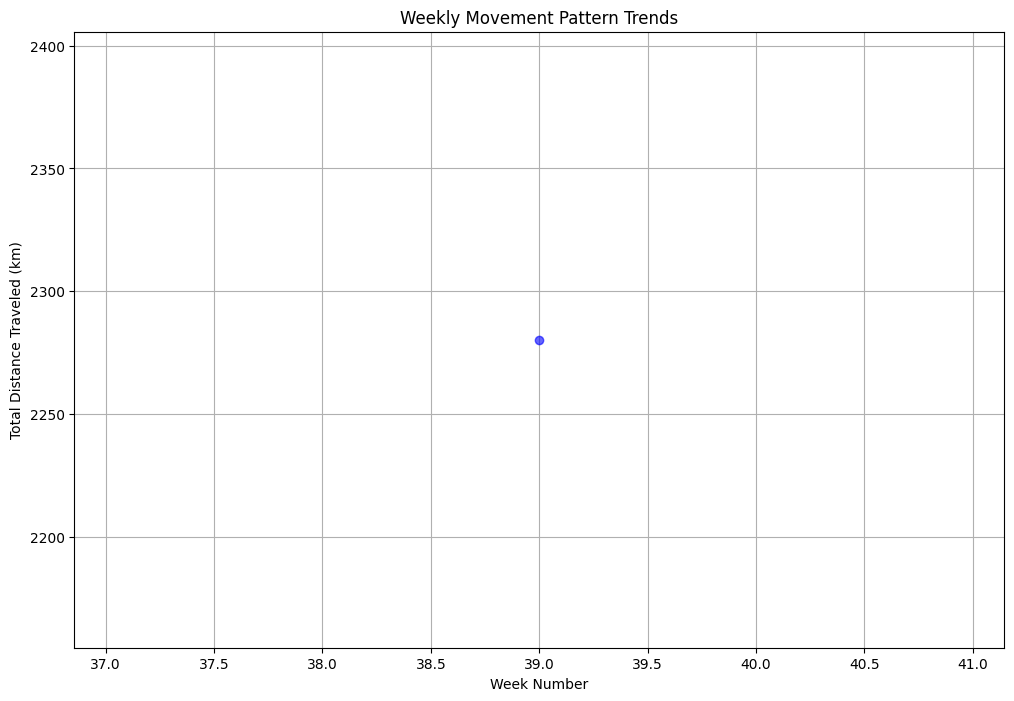

In [60]:
# Extract week number and year
gps_data['Week'] = gps_data['DateTime'].dt.isocalendar().week
gps_data['Year'] = gps_data['DateTime'].dt.isocalendar().year

# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Aggregate data by week
weekly_data = gps_data.groupby(['Year', 'Week']).agg({'Distance_km': 'sum'}).reset_index()

# Plot the weekly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(weekly_data['Week'], weekly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Week Number')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Weekly Movement Pattern Trends')
plt.grid(True)
plt.show()

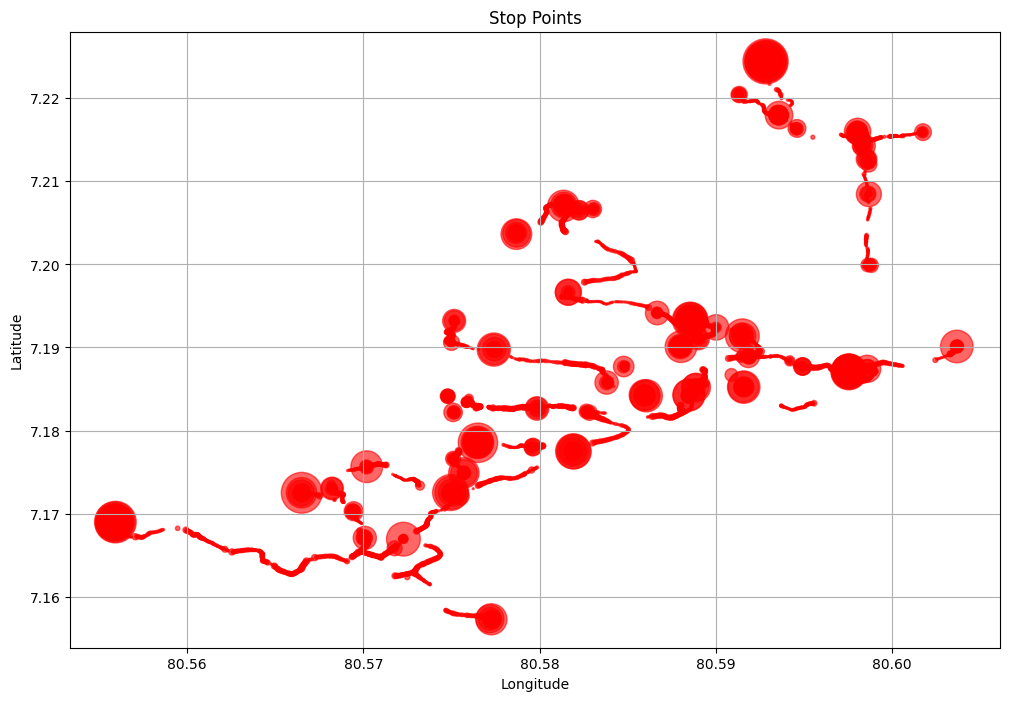

In [62]:
# Define a threshold for considering a stop (e.g., speed < 1 km/h)
stop_threshold = 1.0
gps_data['Is_Stop'] = gps_data['Speed_kmh'] < stop_threshold

# Aggregate data to find stop points
stop_points = gps_data[gps_data['Is_Stop']].groupby(['Longitude', 'Latitude']).size().reset_index(name='Stop_Count')

# Plot the stop points
plt.figure(figsize=(12, 8))
plt.scatter(stop_points['Longitude'], stop_points['Latitude'], s=stop_points['Stop_Count']*2, color='r', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stop Points')
plt.grid(True)
plt.show()


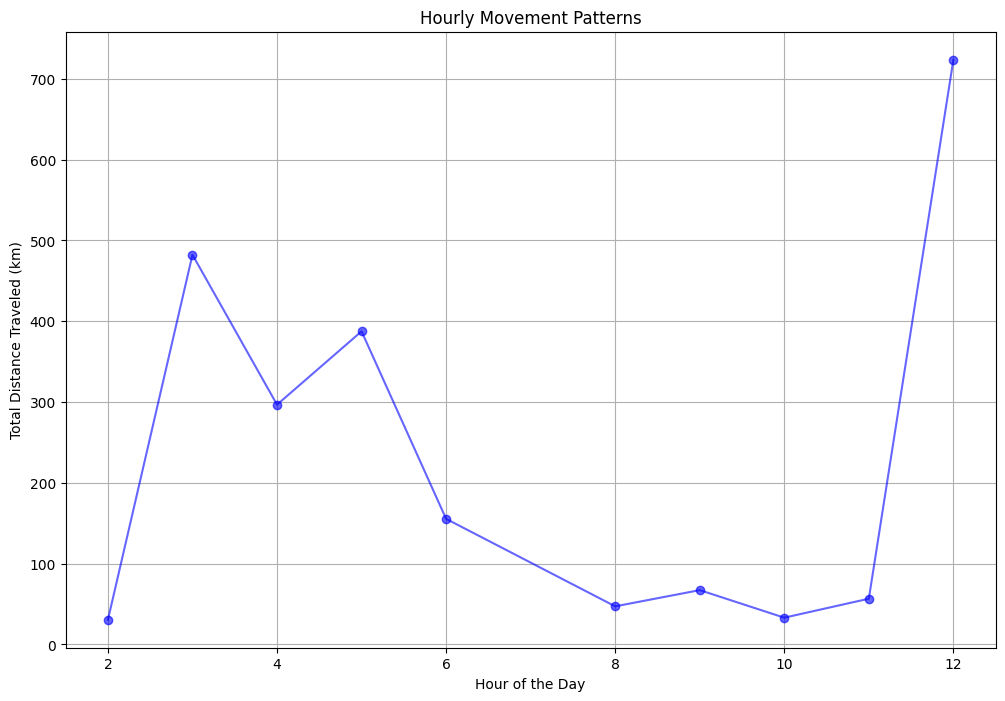

In [64]:
# Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Hourly Movement Patterns')
plt.grid(True)
plt.show()


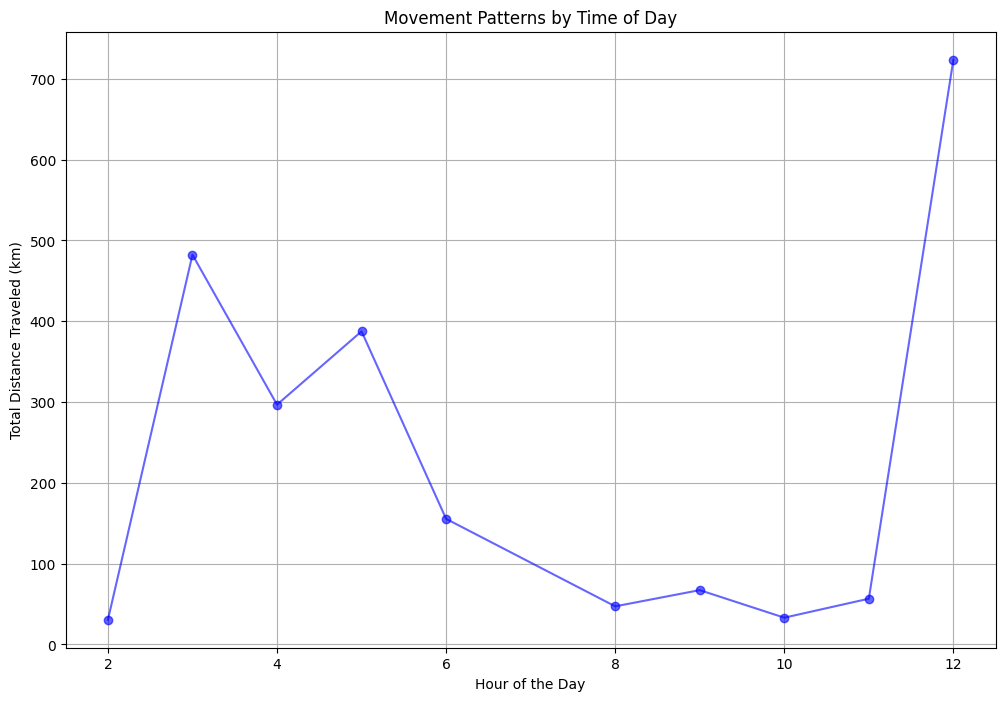

In [66]:
# Ensure the 'TimeStamp' column is in datetime format
gps_data['DateTime'] = pd.to_datetime(gps_data['TimeStamp'], unit='ms')

# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Movement Patterns by Time of Day')
plt.grid(True)
plt.show()


   Hour  Distance_km
9    12   723.628317
1     3   482.278214
3     5   387.489031
2     4   296.738043
4     6   155.425943


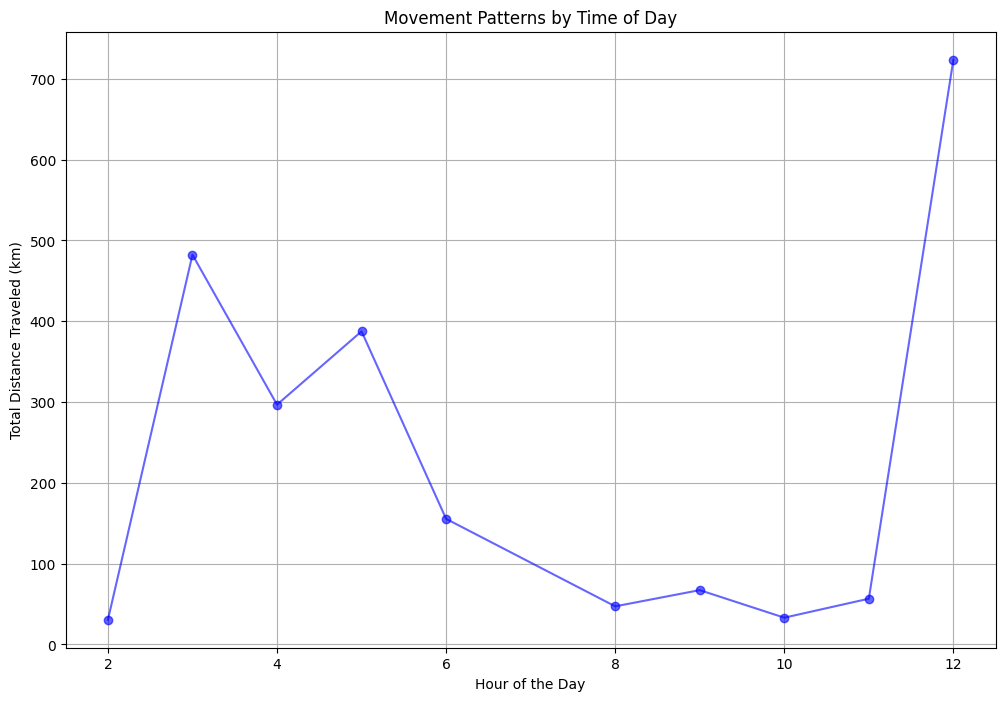

In [67]:
# Ensure the 'TimeStamp' column is in datetime format
gps_data['DateTime'] = pd.to_datetime(gps_data['TimeStamp'], unit='ms')

# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances using the Haversine formula
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Sort by distance to identify busiest hours
busiest_hours = hourly_data.sort_values(by='Distance_km', ascending=False)

# Display the top busiest hours
print(busiest_hours.head())

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Movement Patterns by Time of Day')
plt.grid(True)
plt.show()
